In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [54]:
listings_df = pd.read_csv("listings.csv")
calendar_df = pd.read_csv("calendar.csv")
reviews_df = pd.read_csv("reviews.csv")


In [55]:
# Print the first 5 rows
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [56]:
# Print The Dataset shape
listings_df.shape

(3818, 92)

In [57]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [58]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

**Data Cleaning**


In [59]:
# Identify duplicate columns
duplicate_columns = listings_df.columns[listings_df.columns.duplicated()]

# Drop duplicate columns
listings_df = listings_df.drop(columns=duplicate_columns)

In [60]:
# Drop columns with full NA
listings_df.dropna(axis=1, how='all', inplace=True)

In [61]:
# Drop columns with only one unique value
listings_df.drop([c for c in listings_df.columns if listings_df[c].nunique()==1], axis=1, inplace=True)

In [62]:
# Drop columns representing url
listings_df.drop(listings_df.columns[listings_df.columns.str.contains("url")], axis=1, inplace=True)

In [63]:
# Reformat the money related columns
listings_df.price = listings_df.price.str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.weekly_price = listings_df.weekly_price.str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.monthly_price = listings_df.monthly_price.str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.security_deposit = listings_df.security_deposit.str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.cleaning_fee = listings_df.cleaning_fee.str.replace(r"$", "").str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.extra_people = listings_df.extra_people.str.replace(r"$","").str.replace(",","").astype("float32")

In [64]:
# Dropping specified columns with high missing values
columns_to_drop = [
    'square_feet', 'summary', 'space', 'neighborhood_overview', 'notes', 'transit',
]

# Dropping host-related information (selecting by pattern)
host_related_columns = listings_df.columns[listings_df.columns.str.contains('^host_')]
columns_to_drop.extend(host_related_columns)

# Dropping the columns
listings_df.drop(columns=columns_to_drop, inplace=True)

In [65]:
# Listing the numerical and categorical columns
numerical_columns = listings_df.select_dtypes(exclude=object).columns.tolist()
categorical_columns = listings_df.select_dtypes(include=object).columns.tolist()

In [66]:
# Dealing With Null Values
# Numeric columns: Use median imputation
numeric_imputer = SimpleImputer(strategy='median')
listings_df[numerical_columns] = numeric_imputer.fit_transform(listings_df[numerical_columns])

# Categorical columns with mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
listings_df[categorical_columns] = categorical_imputer.fit_transform(listings_df[categorical_columns])

**Data Analysis**

# Basic Statistics

In [67]:

# Summary statistics for price
listings_df['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [68]:
# Average number of bedrooms
listings_df['bedrooms'].mean()

1.3072289156626506

In [69]:
quantiles = listings_df['price'].quantile([0.25, 0.5, 0.75])
print(quantiles)

0.25     75.0
0.50    100.0
0.75    150.0
Name: price, dtype: float64


In [70]:
# Average number of bathrooms
listings_df['bathrooms'].mean()

1.2583813514929283

In [71]:
# Average review scores rating
listings_df['review_scores_rating'].mean()

94.78679937139864

In [72]:
# Estimating occupancy rates
average_annual_availability = listings_df['availability_365'].mean()
estimated_annual_occupancy_rate = 100 - (average_annual_availability / 365 * 100)
estimated_annual_occupancy_rate

32.938998399793334

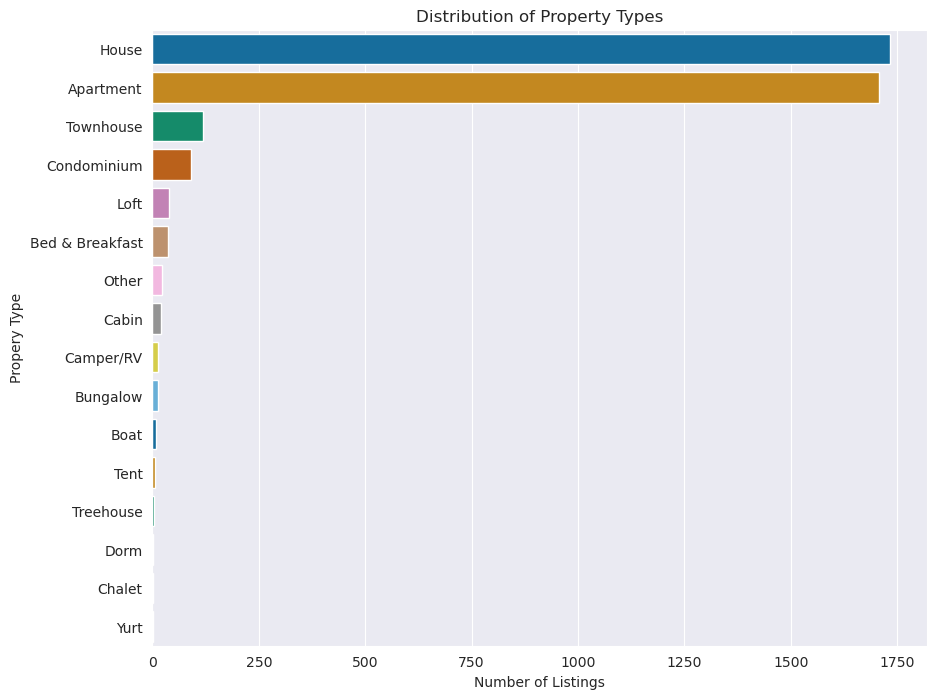

In [73]:
# Distribution of Property Types
sns.set_style("darkgrid")  # Set the aesthetic style of the plots

# Calculate teh distribution of the property types
property_type_counts = listings_df['property_type'].value_counts()

# Create a bar chart for the distribution of propery types
plt.figure(figsize=(10, 8))
sns.barplot(x=property_type_counts.values, y=property_type_counts.index, palette="colorblind")
plt.title("Distribution of Property Types")
plt.xlabel("Number of Listings")
plt.ylabel("Propery Type")
plt.show()

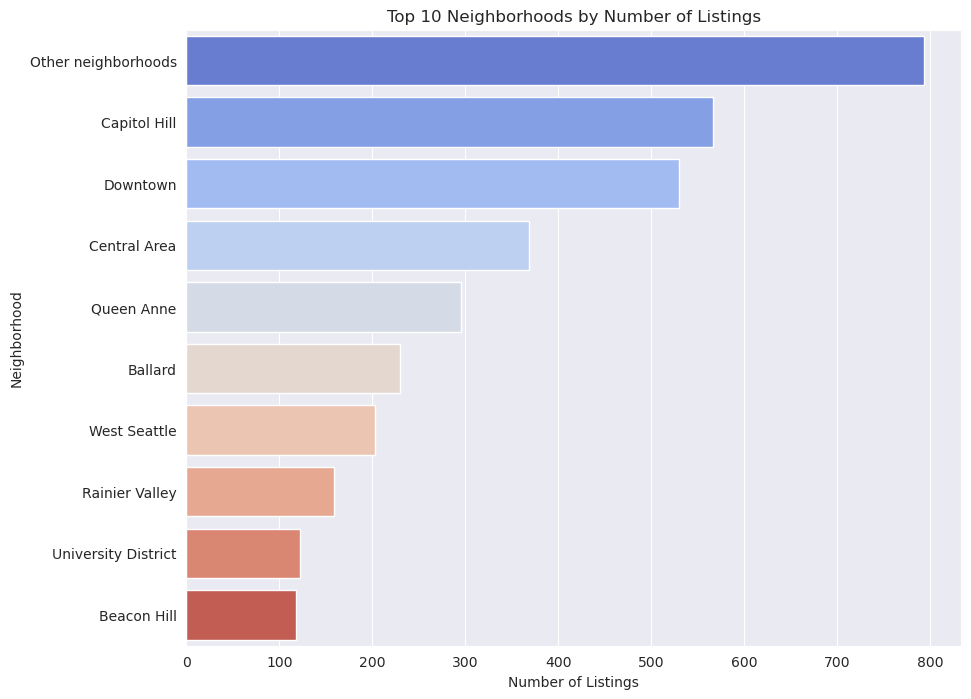

In [74]:
# Distribution of Neighborhoods
neighborhood_counts = listings_df['neighbourhood_group_cleansed'].value_counts().head(10) # Calculate the distribution of listings by neighborhood

# Create a bar chart for the top neighborhoods with the most listings
plt.figure(figsize=(10, 8))
sns.barplot(x=neighborhood_counts.values, y=neighborhood_counts.index, palette="coolwarm")
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

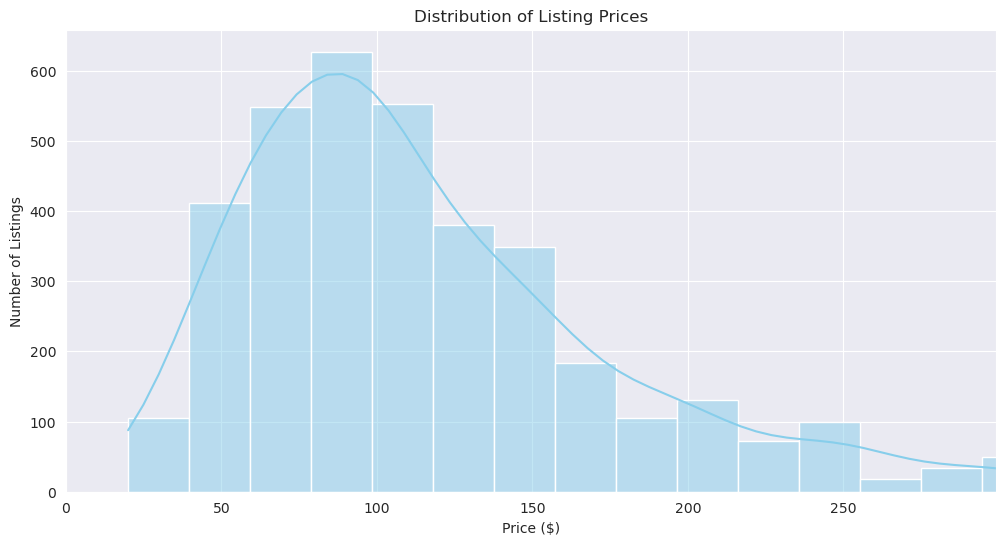

In [75]:
# Price Distribution
plt.figure(figsize=(12, 6))
sns.histplot(listings_df['price'], bins=50, kde=True, color="skyblue")
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, listings_df['price'].quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization
plt.show()

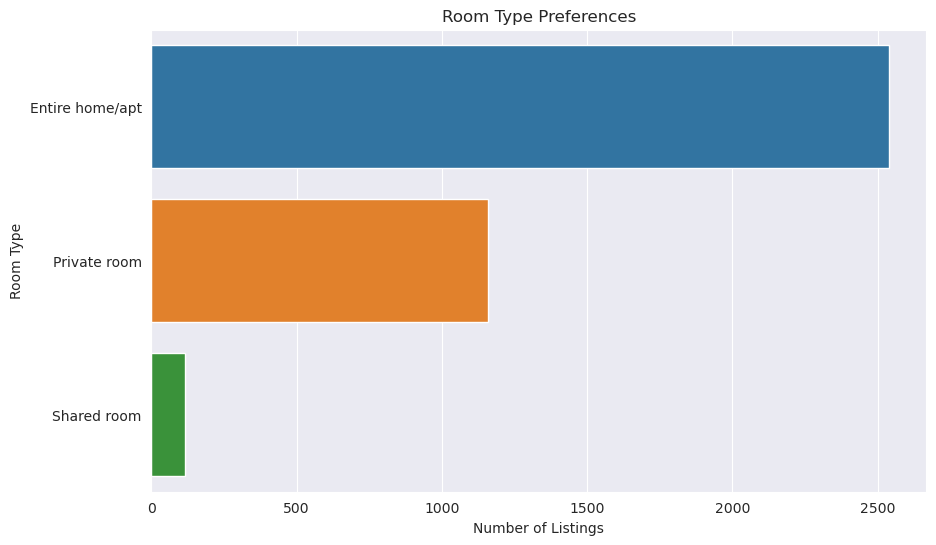

In [76]:
# Room Type Preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=listings_df, y='room_type', order=listings_df['room_type'].value_counts().index)
plt.title('Room Type Preferences')
plt.xlabel('Number of Listings')
plt.ylabel('Room Type')
plt.show()

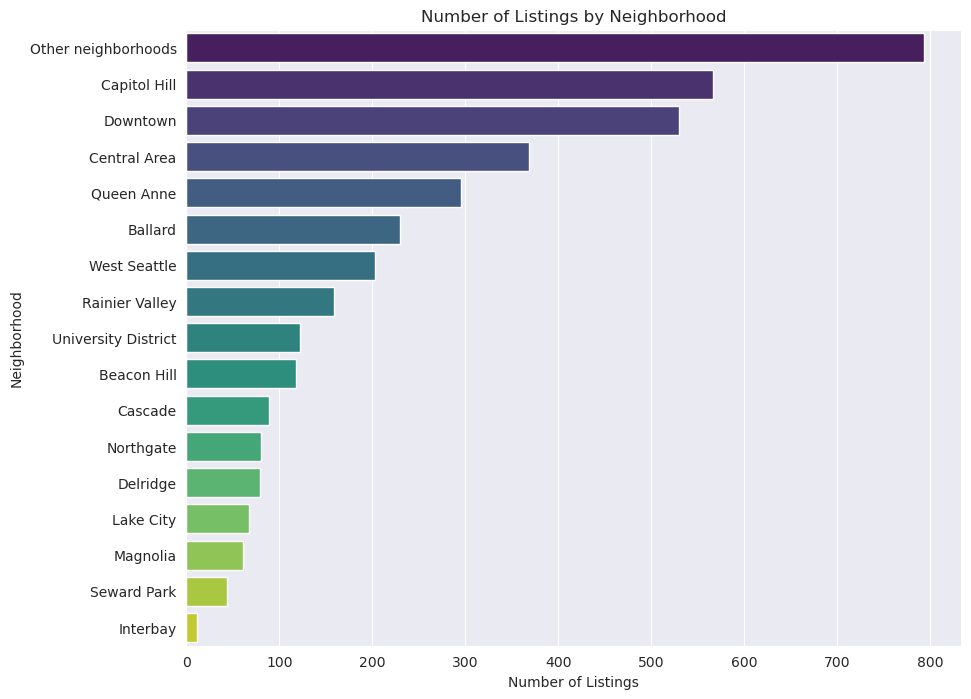

In [77]:
# Number of Listings by Neighborhood
plt.figure(figsize=(10, 8))
sns.countplot(data=listings_df, y='neighbourhood_group_cleansed', order=listings_df['neighbourhood_group_cleansed'].value_counts().index,palette='viridis')
plt.title('Number of Listings by Neighborhood')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

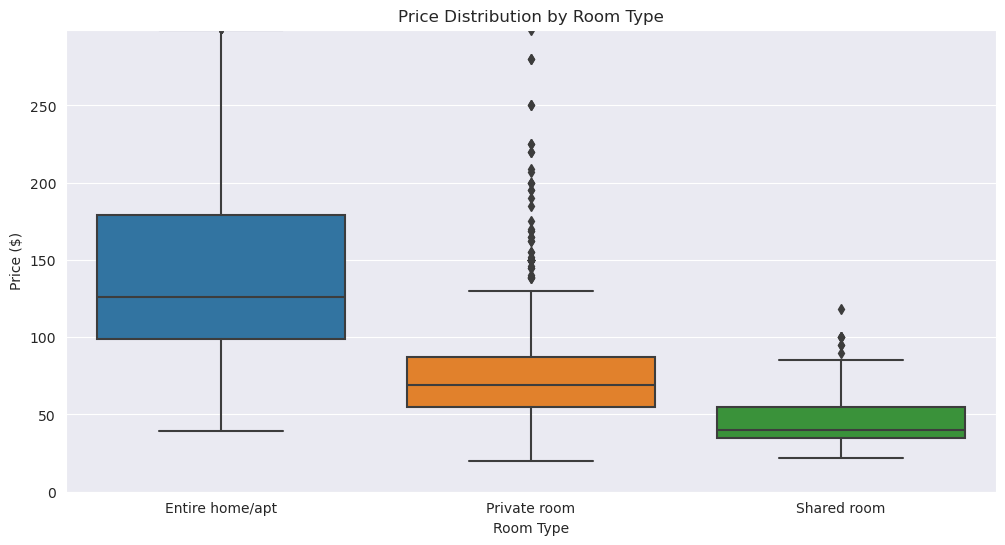

In [78]:
# Price by Room Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=listings_df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.ylim(0, listings_df['price'].quantile(0.95))  # Limiting y-axis to 95th percentile for better visualization
plt.show()




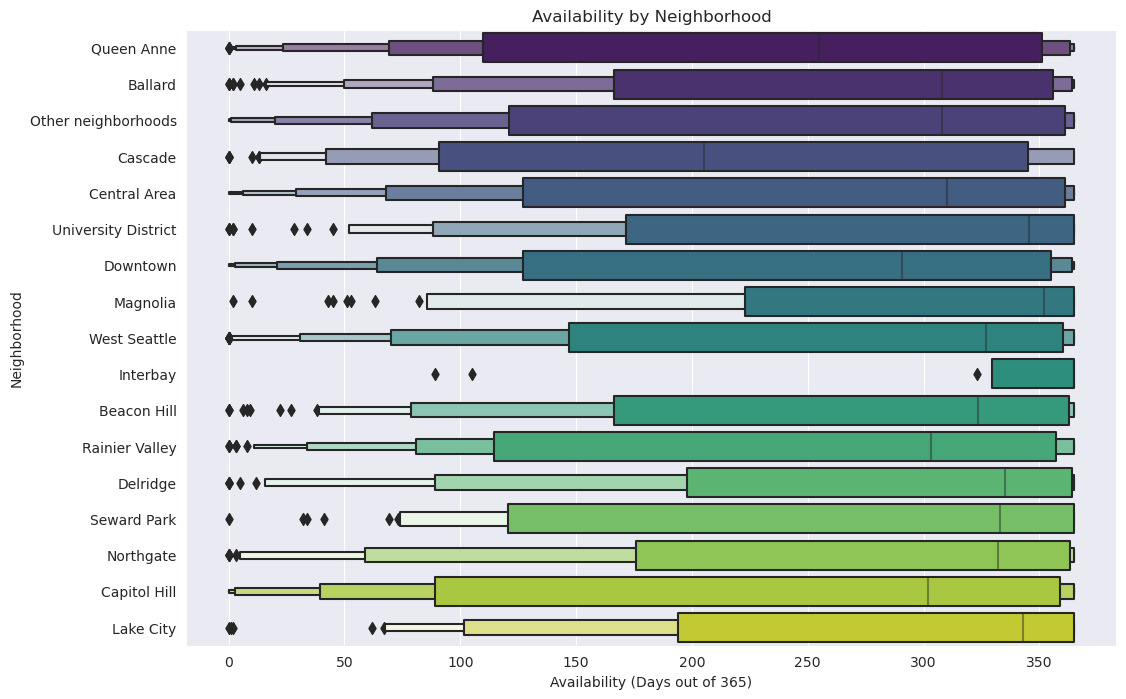

In [79]:
# Availability by Neighborhood
plt.figure(figsize=(12, 8))
sns.boxenplot(y='neighbourhood_group_cleansed', x='availability_365', data=listings_df,palette='viridis')
plt.title('Availability by Neighborhood')
plt.xlabel('Availability (Days out of 365)')
plt.ylabel('Neighborhood')
plt.show()

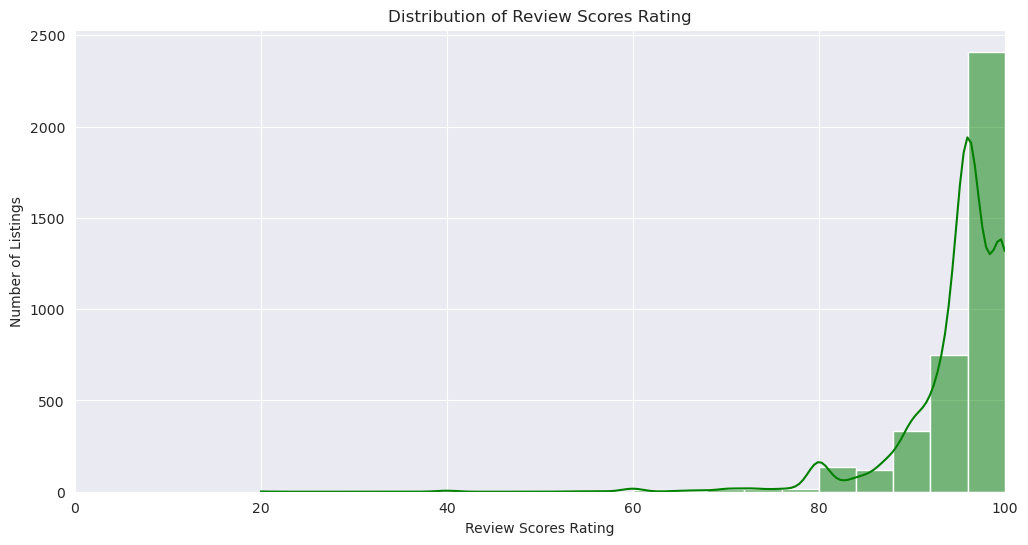

In [80]:
# Review Scores Rating Distribution
plt.figure(figsize=(12, 6))
sns.histplot(listings_df['review_scores_rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Number of Listings')
plt.xlim(0, 100)  # Review scores are typically on a scale from 0 to 100
plt.show()

**Correlatioon Analysis**

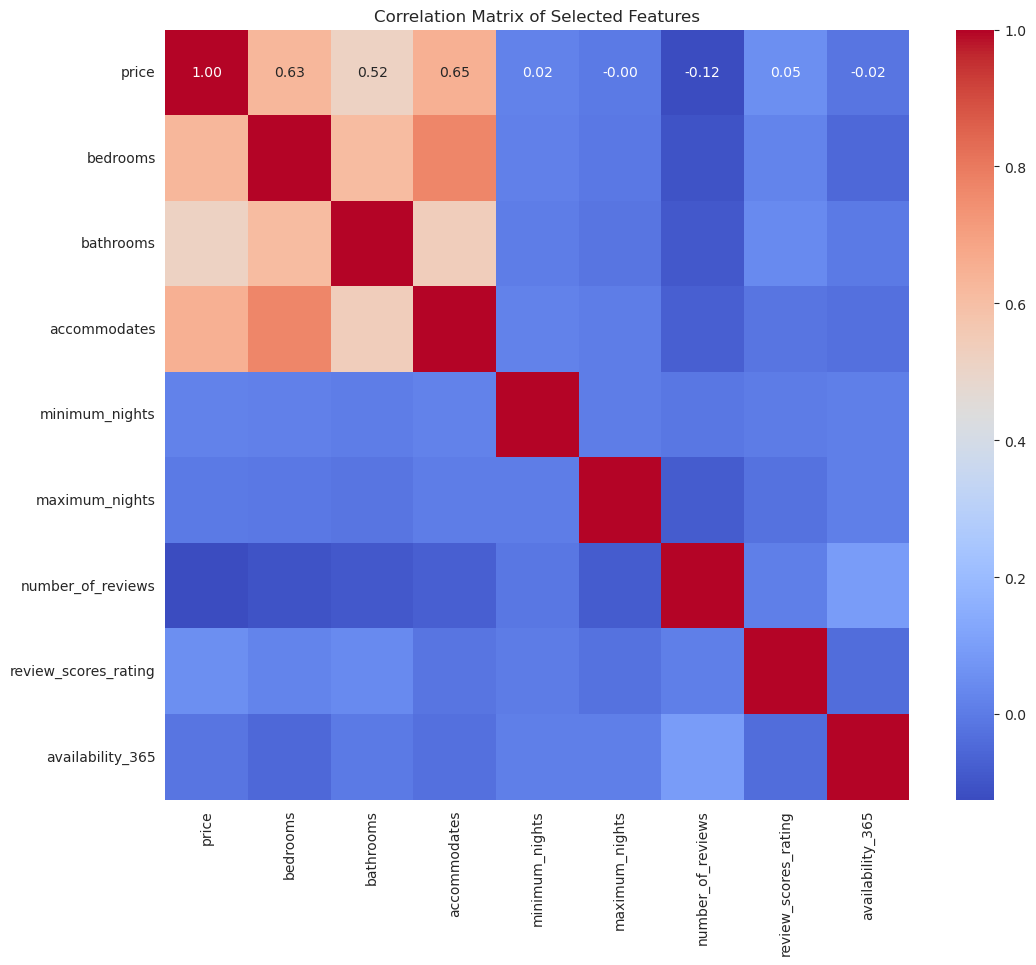

In [81]:
# Select relevant numerical columns for correlation analysis
numerical_columns = [
    'price', 'bedrooms', 'bathrooms', 'accommodates',
    'minimum_nights', 'maximum_nights', 'number_of_reviews',
    'review_scores_rating', 'availability_365'
]
# but all of these features are in the object type, so we need to convert them
for col in numerical_columns:
    listings_df[col] = pd.to_numeric(listings_df[col], errors='coerce')

# Calculate the correlation matrix
corr_matrix = listings_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()